Belfiore Asia, CID:02129867

MSc Advanced Computing, Spring Term, January 2025

# **Acute Kidney Injury (AKI) Neural Network Predictor**

In [93]:
import numpy as np  # add to requirements.txt
import torch    # add to requirements.txt
import torch.nn as nn
from utils import *
import matplotlib.pyplot as plt

# 0. Define Local Data Paths
train_data_path = 'data/training.csv'
test_data_path = 'data/test.csv'

# GPU availability check (MAC)
# if torch.backends.mps.is_available():
#     mps_device = torch.device("mps")
#     x = torch.ones(1, device=mps_device)
#     print (x)
# else:
#     print ("MPS device not found.")


def plot_accuracy(model, y_true, model_name, f3_score):
    fig, ax = plt.subplots()
    plt.hist(model, color='g', alpha=0.4, label='NHS')
    if y_true is not None:
        plt.hist(y_true, color='r', alpha=1, histtype='step', label='True Diagnosis')
    plt.title(f"Accuracy of {model_name} with F3 Score: {f3_score}")
    plt.xlabel(f'{model_name} Diagnosis')
    plt.ylabel('Number of Patients')
    plt.legend()

In [84]:
from importlib import reload
import numpy as np 
import utils
reload(utils)

from utils import *

In [ ]:
# Define Model Architecture
class AkiPred(nn.Module):
    """
        AkiPred Model
        architecture:
            input layer  
            -> hidden layer 1 
            -> dropout layer 
            -> hidden layer 2 
            -> output layer
    """

    def __init__(self, input_size, hidden_size):
        """
            Define Model Architecture
            inputs: 
                input_size: number of features in the input data
                hidden_size: number of neurons in the hidden layers

        """
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # input layer ()
        self.input_layer = nn.Linear(input_size, hidden_size)

        # (2) hidden layers ()
        self.hidden1 = nn.Linear(hidden_size, hidden_size)
        # dropout layer
        self.dropout = nn.Dropout(p=0.1)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)

        # output layer ()
        self.output_layer = nn.Linear(hidden_size, 1) 

        # activation functions #
        # self.prelu = nn.PReLU(1)  # for hidden layers 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # for output layer 

    # model forward pass
    def forward(self, x):
        """
            AkiPred model: 
            inputs: 
                x: number of features in the input data
        """
        # ReLU activation for input and hidden layers #
        x = self.relu(self.input_layer(x)) 
        x = self.relu(self.hidden1(x)) 
        x = self.dropout(x)   # dropout layer
        x = self.relu(self.hidden2(x)) 
        x = self.output_layer(x)
        x = self.sigmoid(x) # squash output between 0 and 1
        return x
    
    # def xavier_init(self, m):
    #     if type(m) == nn.Linear:
    #         torch.nn.init.xavier_uniform_(m.weight)


# Save Model after training is complete
def save_model(model):
    """
        Save AkiPred Model
        input: 
            model: AkiPred model
        output: -
    """
    model_path = 'aki_predictor/aki_predictor.pth'
    try:
        torch.save(model, model_path)
        print("Saved PyTorch Model State to", model_path)
    except:
        print("An error occurred.")


# Model Training Pipeline 
def train_model(model, train_data):
    """
        Pipeline to Train AkiPred Model
        input: 
            model: AkiPred model
            train_data: training data 
                        (age, sex, blood tests cretinine results, time elapsed between tests)
        output: -
    """
    # set epochs and batch size
    epochs_num = 100
    batch_size = 250
    model_train_loss = [] # save model loss for each epoch

    # set model parameters
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer
    model_loss = nn.MSELoss()  # Mean Squared Error Loss
    # model_loss = nn.BCELoss()  # Binary Cross Entropy Loss

    dataloader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # train model 
    for epoch in range(epochs_num): 
        model.train()
        for i, (sample, x, y) in enumerate(dataloader_train):
            # inputs
            inputs = x
            # target outputs
            target = y.unsqueeze(1) # to match model output shape [batch_size, 1]

            # model outputs
            outputs = model(inputs) 
            loss = model_loss(outputs, target)  # compute loss

            # step + optimizer
            optimizer.zero_grad()  
            loss.backward()
            optimizer.step()

        model_train_loss.append(loss.item())
        
        if (epoch+1)%50 == 0:
            # Get the loss for every 50th epoch
            print(f'Epoch {epoch+1}/{epochs_num}: --> Loss = {loss.item()}')

    # save_model(model)


In [ ]:
# Model Training Pipeline 
def train_model(model, train_data):
    # set epochs and batch size
    epochs_num = 100
    batch_size = 250
    model_train_loss = [] # save model loss for each epoch

    # set model parameters
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer
    model_loss = nn.MSELoss()  # Mean Squared Error Loss
    # model_loss = nn.BCELoss()  # Binary Cross Entropy Loss

    dataloader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # train model 
    for epoch in range(epochs_num): 
        model.train()
        for i, (sample, x, y) in enumerate(dataloader_train):
            # inputs
            inputs = x
            # target outputs
            target = y.unsqueeze(1) # to match model output shape [batch_size, 1]

            # model outputs
            outputs = model(inputs) 
            loss = model_loss(outputs, target)  # compute loss

            # step + optimizer
            optimizer.zero_grad()  
            loss.backward()
            optimizer.step()

        model_train_loss.append(loss.item())
        
        if (epoch+1)%50 == 0:
            # Get the loss for every 50th epoch
            print(f'Epoch {epoch+1}/{epochs_num}: --> Loss = {loss.item()}')

    # save_model(model)


In [95]:
# 1. Load Training and Testing Datasets
train_data = prepare_dataset('data/training.csv', 'train')
# test_data = prepare_dataset('data/test.csv', 'test')
train_data

,patient_features,aki_score
0,"[0, 35, 98.76, 98.76, 105.61, 1.0, -6.84999999...",0
1,"[0, 25, 210.52, 174.11, 210.22, 1.209120670840...",0
2,"[0, 30, 104.41, 104.41, 106.265, 1.0, -3.71000...",0
3,"[0, 21, 219.77, 206.12, 217.14, 1.066223559091...",0
4,"[0, 66, 117.44, 80.58, 112.155, 1.457433606353...",0
...,...,...
999995,"[0, 50, 73.26, 72.17, 78.99, 1.015103228488291...",0
999996,"[0, 64, 121.36, 107.47, 118.14, 1.129245370801...",0
999997,"[1, 47, 79.4, 79.4, 84.64500000000001, 1.0, -1...",0
999998,"[1, 62, 118.14, 73.75, 104.93, 1.6018983050847...",0


In [ ]:
# 2. Train Model
input_size = 10
hidden_size = 64
model = AkiPred(input_size, hidden_size)
# model.apply(model.xavier_init)
print(model, "\nTotal samples:", len(train_data))

In [ ]:
# 3. Make Predictions on Validation Dataset
model_aki = model(input)

In [ ]:
# 4. Compute F3 Score
model_f3 = fbeta_score(train_data['aki_score'], model_aki, beta=3)

In [ ]:
# 4.b. Plot Model Accuracy
plot_accuracy(model_aki, train_data['aki_score'], 'Trained Model', model_f3)

In [98]:
# 5 Compare to NHS algorithm
# 5.a NHS Train Dataset Prediction 
nhs_aki = train_data['patient_features'].apply(lambda patient_record: nhs_aki_algo(patient_record))
nhs_f3 = fbeta_score(train_data['aki_score'], nhs_aki, beta=3)
(train_data['aki_score'] == nhs_aki).value_counts(), nhs_f3

(True     940660
 False     59340
 Name: count, dtype: int64,
 0.8484946326279625)

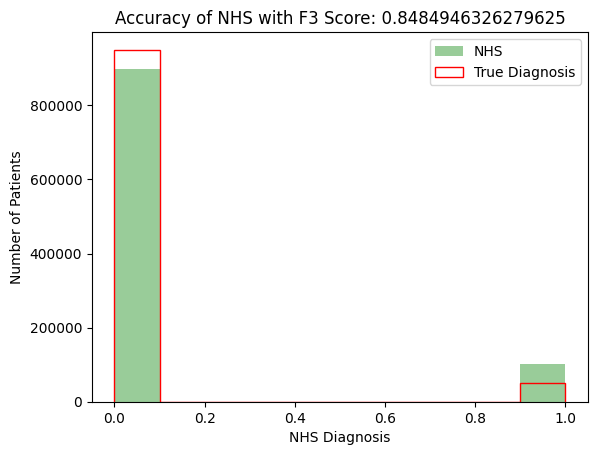

In [99]:
# 5.b Plot Train Prediction Accuracy
plot_accuracy(nhs_aki, train_data['aki_score'], 'NHS', nhs_f3)

In [85]:
# Test Dataset Prediction
test_data = prepare_dataset('data/test.csv', 'test')
# [sex, age, c1, rv1, rv2, rv_ratio, creatinine_change]
# test_data.rename(columns={'1': 'sex'}, inplace=True)
test_data

,0
0,"[1, 29, 137.68, 125.72, 142.47, 1.095132039452..."
1,"[1, 80, 173.51, 71.6, 92.685, 1.87203970437503..."
2,"[1, 39, 89.77, 64.49, 77.13, 1.391998759497596..."
3,"[0, 41, 107.31, 83.08, 91.03, 1.29164660568127..."
4,"[0, 10, 99.12, 82.61, 99.12, 1.199854739135698..."
...,...
9995,"[1, 23, 183.07, 139.38, 173.7, 1.3134596068302..."
9996,"[0, 75, 195.39, 98.53, 120.78, 1.6177347242921..."
9997,"[1, 20, 73.52, 73.52, 79.075, 0.92975023711666..."
9998,"[0, 44, 102.0, 86.24, 94.12, 1.182745825602968..."


In [87]:
# 5.d NHS Test Dataset Prediction 
nhs_test_aki = test_data[0].apply(lambda patient_record: nhs_aki_algo(patient_record))
nhs_test_aki

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: 0, Length: 10000, dtype: int64

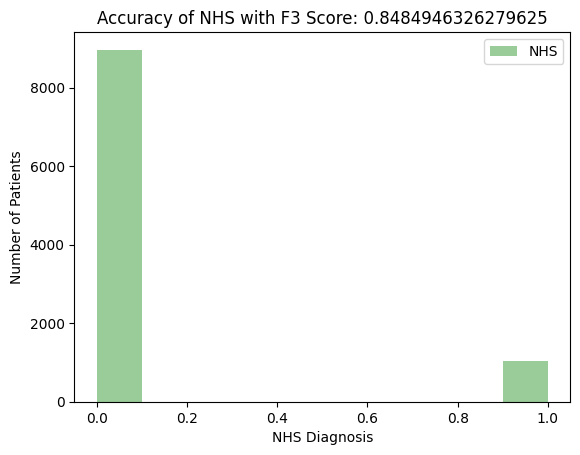

In [ ]:
# 5.d Plot Test Prediction Accuracy
plot_accuracy(nhs_test_aki, None, 'NHS', nhs_f3)